# *CS540 PROJECT : CS CHATBOT*

-**_by TEAM F_**
- **Pavithra Govardhanan**
- **Saptarshi Chatterjee**
- **Shree Harini Ravichandran**
- **Rusha Lawande**




### Importing Packages 

In [1]:
import numpy
import random
import json
import pickle
import nltk
import tensorflow as tf
from flask import Flask,render_template
import flask_restful as restful
from flask_restful import reqparse, abort, Api, Resource
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, Masking, TimeDistributed
from tensorflow. keras.utils import plot_model
from tensorflow.keras.models import Sequential


nltk.download('punkt')

C:\Users\pavig\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pavig\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pavig\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pavig\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

True

In [2]:
from nltk.stem.lancaster import LancasterStemmer
word_stemmer = LancasterStemmer()


### Reading JSON File 

In [ ]:
from nltk.stem.lancaster import LancasterStemmer
with open("covid_dataset.json",encoding="utf-8") as file:
        data = json.load(file)

### Pre-Processing

In [3]:
try:   
    with open("cache_covid.pickle", "rb") as file:
        vocab, label, train, test = pickle.load(file)

except:

    vocab = []
    y = []
    label = []
    x = []
    train = []
    test = []
  

    for i in data["intents"]:
        for j in i["patterns"]:

            words_token = nltk.word_tokenize(j) 
            vocab.extend(words_token) 
            y.append(i["tag"])
            x.append(words_token)

        if i["tag"] not in label:
            label.append(i["tag"])

   
    for w in vocab:
        if w != "?":
            vocab=word_stemmer.stem(w.lower())
    

    label = sorted(label)
    vocab = sorted(list(set(vocab)))


    for _ in range(len(label)):
        out=0
   
    for i, j in enumerate(x):
        bow = []
        for w in j:
            stemmed_words=word_stemmer.stem(w)
       
        for w in vocab:
            if w in stemmed_words:
                bow.append(1)
            else:
                bow.append(0)

        out_line = out[:]
        out_line[labels.index(y[i])] = 1

        test.append(out_line)
        train.append(bow)
        
    
    train = numpy.array(train)
    test = numpy.array(test)

    with open("cache_covid.pickle", "wb") as file:
        pickle.dump((vocab, label, train, test), file)


In [4]:

len(vocab)

304

### Bag of Words 

In [5]:
def bag_words(inputs, vocab):
    bagofwords = [0 for _ in range(len(vocab))]

    word = nltk.word_tokenize(inputs)
    word = [word_stemmer.stem(j.lower()) for j in word]

    for v in word:
        for i, w in enumerate(vocab):
            if v == w:
                bagofwords[i] = 1

    return numpy.array(bagofwords)

### Convolutional Neural Network(CNN) 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
cnn_model = Sequential()
cnn_model.add(Embedding(304, 32, input_length=304))
cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size = 3))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(144,activation='softmax'))
cnn_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 304, 32)           9728      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 300, 128)          20608     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 100, 128)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                640050    
_________________________________________________________________
dense_3 (Dense)              (None, 144)               7344      
Total params: 677,730
Trainable params: 677,730
Non-trainable params: 0
________________________________________________

In [10]:
cnn=cnn_model.fit(train, test, epochs=150,verbose = 2, batch_size=16)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/150
415/415 - 0s - loss: 0.0412 - acc: 0.9931
Epoch 2/150
415/415 - 0s - loss: 0.0398 - acc: 0.9931
Epoch 3/150
415/415 - 0s - loss: 0.0380 - acc: 0.9931
Epoch 4/150
415/415 - 0s - loss: 0.0337 - acc: 0.9931
Epoch 5/150
415/415 - 0s - loss: 0.0267 - acc: 0.9937
Epoch 6/150
415/415 - 0s - loss: 0.0199 - acc: 0.9952
Epoch 7/150
415/415 - 0s - loss: 0.0155 - acc: 0.9964
Epoch 8/150
415/415 - 0s - loss: 0.0128 - acc: 0.9967
Epoch 9/150
415/415 - 0s - loss: 0.0105 - acc: 0.9970
Epoch 10/150
415/415 - 0s - loss: 0.0086 - acc: 0.9973
Epoch 11/150
415/415 - 0s - loss: 0.0070 - acc: 0.9978
Epoch 12/150
415/415 - 0s - loss: 0.0052 - acc: 0.9981
Epoch 13/150
415/415 - 0s - loss: 0.0044 - acc: 0.9983
Epoch 14/150
415/415 - 0s - loss: 0.0040 - acc: 0.9985
Epoch 15/150
415/415 - 0s - loss: 0.0036 - acc: 0.9986
Epoch 16/150
415/415 - 0s - loss: 0.0028 - acc: 0.9987
Epoch 17/150
415/415 - 0s - loss: 0

Epoch 144/150
415/415 - 0s - loss: 0.0011 - acc: 0.9991
Epoch 145/150
415/415 - 0s - loss: 0.0011 - acc: 0.9989
Epoch 146/150
415/415 - 0s - loss: 0.0011 - acc: 0.9991
Epoch 147/150
415/415 - 0s - loss: 0.0012 - acc: 0.9992
Epoch 148/150
415/415 - 0s - loss: 0.0011 - acc: 0.9989
Epoch 149/150
415/415 - 0s - loss: 0.0011 - acc: 0.9992
Epoch 150/150
415/415 - 0s - loss: 0.0011 - acc: 0.9991


In [11]:
cnn_model.save('model_covid_cnn.h5')
print("Model saved successfully...")

Model saved successfully...


### Accuracy (CNN) 

In [13]:


scores = cnn_model.evaluate(train, test, verbose=1)
print("Accuracy:", scores[1])

415/415 [==============================] - 0s 196us/sample - loss: 0.0010 - acc: 0.9993
Accuracy: 0.9992637


### Graph results of CNN 

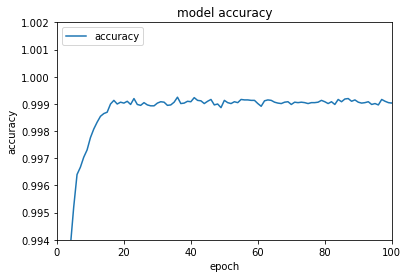

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cnn.history['acc'])
plt.title('model accuracy')
plt.ylim(0.994,1.002)
plt.xlim(0,100)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

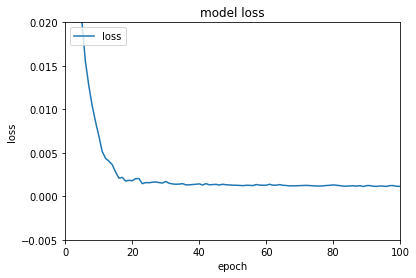

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cnn.history['loss'])
plt.title('model loss')
plt.ylim(-0.005,0.02)
plt.xlim(0,100)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

### Recurrent Neural Network (RNN)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM,SimpleRNN
rnn_model = Sequential()
rnn_model.add(Embedding(304, 32, input_length=304))
rnn_model.add(SimpleRNN(128, activation='relu', return_sequences=True))
rnn_model.add(Flatten())
rnn_model.add(Dense(50, activation='relu'))
rnn_model.add(Dense(144,activation='softmax'))
rnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
rnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 304, 32)           9728      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 304, 128)          20608     
_________________________________________________________________
flatten_2 (Flatten)          (None, 38912)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                1945650   
_________________________________________________________________
dense_4 (Dense)              (None, 144)               7344      
Total params: 1,983,330
Trainable params: 1,983,330
Non-trainable params: 0
_________________________________________________________________


In [30]:
rnn=rnn_model.fit(train, test, epochs=150,verbose = 2, batch_size=16,validation_split=0.1)


Train on 373 samples, validate on 42 samples
Epoch 1/150
 - 2s - loss: 4.8860 - accuracy: 0.0214 - val_loss: 4.8879 - val_accuracy: 0.0000e+00
Epoch 2/150
 - 1s - loss: 4.5046 - accuracy: 0.0563 - val_loss: 6.0793 - val_accuracy: 0.0000e+00
Epoch 3/150
 - 1s - loss: 3.2919 - accuracy: 0.3110 - val_loss: 7.9831 - val_accuracy: 0.2143
Epoch 4/150
 - 1s - loss: 2.2026 - accuracy: 0.5121 - val_loss: 10.0652 - val_accuracy: 0.2381
Epoch 5/150
 - 1s - loss: 1.5952 - accuracy: 0.6193 - val_loss: 11.7201 - val_accuracy: 0.2381
Epoch 6/150
 - 1s - loss: 1.1489 - accuracy: 0.7051 - val_loss: 19.5895 - val_accuracy: 0.2619
Epoch 7/150
 - 1s - loss: 0.8538 - accuracy: 0.7721 - val_loss: 21.1731 - val_accuracy: 0.2381
Epoch 8/150
 - 1s - loss: 0.6303 - accuracy: 0.8284 - val_loss: 24.6664 - val_accuracy: 0.2381
Epoch 9/150
 - 1s - loss: 0.5358 - accuracy: 0.8606 - val_loss: 22.7640 - val_accuracy: 0.2619
Epoch 10/150
 - 1s - loss: 0.3973 - accuracy: 0.8847 - val_loss: 27.6213 - val_accuracy: 0.190

Epoch 84/150
 - 1s - loss: 0.0913 - accuracy: 0.9223 - val_loss: 20.8531 - val_accuracy: 0.2619
Epoch 85/150
 - 1s - loss: 0.0856 - accuracy: 0.9330 - val_loss: 21.3313 - val_accuracy: 0.2619
Epoch 86/150
 - 1s - loss: 0.0893 - accuracy: 0.9357 - val_loss: 21.6719 - val_accuracy: 0.2619
Epoch 87/150
 - 1s - loss: 0.0935 - accuracy: 0.9276 - val_loss: 19.9478 - val_accuracy: 0.2619
Epoch 88/150
 - 1s - loss: 0.0880 - accuracy: 0.9383 - val_loss: 21.1478 - val_accuracy: 0.2619
Epoch 89/150
 - 1s - loss: 0.0836 - accuracy: 0.9303 - val_loss: 22.1124 - val_accuracy: 0.2619
Epoch 90/150
 - 1s - loss: 0.0877 - accuracy: 0.9223 - val_loss: 21.9811 - val_accuracy: 0.2619
Epoch 91/150
 - 1s - loss: 0.0905 - accuracy: 0.9276 - val_loss: 20.4900 - val_accuracy: 0.2619
Epoch 92/150
 - 1s - loss: 0.0889 - accuracy: 0.9196 - val_loss: 20.6689 - val_accuracy: 0.2619
Epoch 93/150
 - 1s - loss: 0.0902 - accuracy: 0.9437 - val_loss: 18.8105 - val_accuracy: 0.2619
Epoch 94/150
 - 1s - loss: 0.0896 - accu

### Accuracy (RNN) 

In [33]:
rnn_model.save('model_covid_rnn.h5')
print("Model saved successfully...")

scores = rnn_model.evaluate(train, test, verbose=1)
print("Accuracy:", scores[1])

Model saved successfully...
415/415 [==============================] - 0s 654us/step
Accuracy: 0.8698795437812805


### Graph results of RNN 

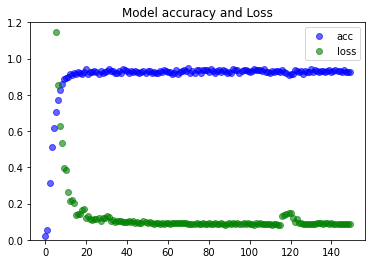

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

acc=rnn.history['accuracy']
loss=rnn.history['loss']


epochs=range(len(acc))

plt.plot(epochs,acc,'bo', alpha = 0.6, label='acc')
plt.ylim(0,1.2)
plt.plot(epochs, loss,'go',alpha=0.6, label='loss')
plt.title('Model accuracy and Loss')
plt.legend()

### Long Short Term Memory (LSTM)

In [41]:

lstm_model = Sequential()
lstm_model.add(Embedding(304, 32,input_length = 304))
lstm_model.add(LSTM(196, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(144,activation='sigmoid'))
lstm_model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])




In [42]:
lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 304, 32)           9728      
_________________________________________________________________
lstm_3 (LSTM)                (None, 196)               179536    
_________________________________________________________________
dense_7 (Dense)              (None, 144)               28368     
Total params: 217,632
Trainable params: 217,632
Non-trainable params: 0
_________________________________________________________________


In [43]:
lstm=lstm_model.fit(train, test, epochs=150,verbose = 2, batch_size=16,validation_split=0.1)

Train on 373 samples, validate on 42 samples
Epoch 1/150
 - 5s - loss: 0.3649 - accuracy: 0.9179 - val_loss: 0.0504 - val_accuracy: 0.9931
Epoch 2/150
 - 4s - loss: 0.0409 - accuracy: 0.9931 - val_loss: 0.0443 - val_accuracy: 0.9931
Epoch 3/150
 - 4s - loss: 0.0377 - accuracy: 0.9931 - val_loss: 0.0465 - val_accuracy: 0.9931
Epoch 4/150
 - 4s - loss: 0.0372 - accuracy: 0.9931 - val_loss: 0.0475 - val_accuracy: 0.9931
Epoch 5/150
 - 4s - loss: 0.0372 - accuracy: 0.9931 - val_loss: 0.0485 - val_accuracy: 0.9931
Epoch 6/150
 - 4s - loss: 0.0372 - accuracy: 0.9931 - val_loss: 0.0498 - val_accuracy: 0.9931
Epoch 7/150
 - 4s - loss: 0.0372 - accuracy: 0.9931 - val_loss: 0.0506 - val_accuracy: 0.9931
Epoch 8/150
 - 4s - loss: 0.0372 - accuracy: 0.9931 - val_loss: 0.0514 - val_accuracy: 0.9931
Epoch 9/150
 - 4s - loss: 0.0372 - accuracy: 0.9931 - val_loss: 0.0518 - val_accuracy: 0.9931
Epoch 10/150
 - 4s - loss: 0.0372 - accuracy: 0.9931 - val_loss: 0.0526 - val_accuracy: 0.9931
Epoch 11/150
 

Epoch 87/150
 - 4s - loss: 0.0374 - accuracy: 0.9931 - val_loss: 0.0675 - val_accuracy: 0.9931
Epoch 88/150
 - 4s - loss: 0.0376 - accuracy: 0.9931 - val_loss: 0.0676 - val_accuracy: 0.9931
Epoch 89/150
 - 4s - loss: 0.0373 - accuracy: 0.9931 - val_loss: 0.0680 - val_accuracy: 0.9931
Epoch 90/150
 - 4s - loss: 0.0374 - accuracy: 0.9931 - val_loss: 0.0677 - val_accuracy: 0.9931
Epoch 91/150
 - 4s - loss: 0.0374 - accuracy: 0.9931 - val_loss: 0.0680 - val_accuracy: 0.9931
Epoch 92/150
 - 4s - loss: 0.0373 - accuracy: 0.9931 - val_loss: 0.0682 - val_accuracy: 0.9931
Epoch 93/150
 - 4s - loss: 0.0374 - accuracy: 0.9931 - val_loss: 0.0682 - val_accuracy: 0.9931
Epoch 94/150
 - 4s - loss: 0.0374 - accuracy: 0.9931 - val_loss: 0.0682 - val_accuracy: 0.9931
Epoch 95/150
 - 4s - loss: 0.0375 - accuracy: 0.9931 - val_loss: 0.0681 - val_accuracy: 0.9931
Epoch 96/150
 - 4s - loss: 0.0375 - accuracy: 0.9931 - val_loss: 0.0686 - val_accuracy: 0.9931
Epoch 97/150
 - 4s - loss: 0.0373 - accuracy: 0.99

### Accuracy (LSTM) 

In [44]:
lstm_model.save('model_covid_lstm.h5')
print("Model saved successfully...")

scores = lstm_model.evaluate(train, test, verbose=1)
print("Accuracy:", scores[1])

Model saved successfully...
415/415 [==============================] - 3s 7ms/step
Accuracy: 0.9930722117424011


### Graph results of LSTM

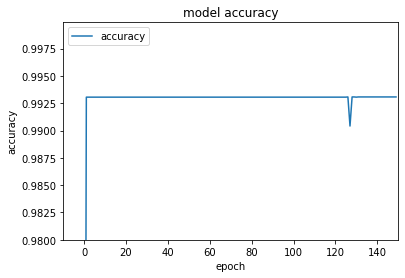

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(lstm.history['accuracy'])
plt.title('model accuracy')
plt.ylim(0.98,0.9999)
plt.xlim(-10,150)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

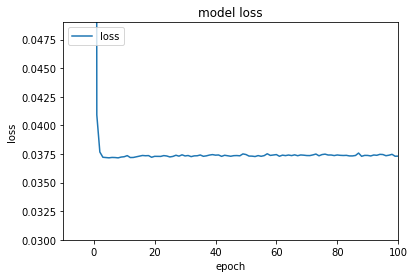

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(lstm.history['loss'])
plt.title('model loss')
plt.ylim(0.030,0.049)
plt.xlim(-10,100)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()